<a href="https://colab.research.google.com/github/disha2sinha/Reducing-Imbalanced-dataset-by-Under-sampling-approach-Consensus-Clustering/blob/main/Generating_CLustering_with_different_Clustering_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dataset

In [1]:
import pandas as pd 
import io 
colon_df = pd.read_csv('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Anonymized\\aug_train_anonymized.csv')
colon_df.head()

id  Gender  Driving_License  Region_Code  \
0  b20dcf88-70f8-4ca4-8d64-d313ec30db4b    Male                1          7.0   
1  f1633ab2-7725-4c76-86f9-c15e1380f7c3    Male                1         28.0   
2  c66d6cba-2f23-4403-83c4-bc493213f42d  Female                1         33.0   
3  43184053-b80b-4113-b032-8b2aa582c529  Female                1         33.0   
4  04363803-b50a-4ff2-a6d9-8e945d360387    Male                1         46.0   

   Previously_Insured Vehicle_Age Vehicle_Damage  Annual_Premium  \
0                   1    < 1 Year             No          2630.0   
1                   0    1-2 Year            Yes         43327.0   
2                   0    1-2 Year            Yes         35841.0   
3                   0    < 1 Year             No         27645.0   
4                   1    < 1 Year             No         29023.0   

   Policy_Sales_Channel  Vintage  Response  Age_Group  
0                 152.0       16         0   YoungAge  
1                  26.0      135         0  MiddleAge  
2                 124.0      253         0     OldAge  
3                 152.0       69         0   YoungAge  
4                 152.0      211         0   YoungAge

In [2]:
# Check data types
colon_df.dtypes

id                       object
Gender                   object
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
Age_Group                object
dtype: object

In [3]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoders for the new dataset
le_vehicle_age_new = LabelEncoder()
le_vehicle_damage_new = LabelEncoder()
le_age_new = LabelEncoder()
le_gender_new = LabelEncoder()
le_region_new = LabelEncoder()
#le_vintage_new = LabelEncoder()
#le_region_frequency= LabelEncoder()

# Encode categorical columns in the new dataset
colon_df['Vehicle_Age'] = le_vehicle_age_new.fit_transform(colon_df['Vehicle_Age'])
colon_df['Vehicle_Damage'] = le_vehicle_damage_new.fit_transform(colon_df['Vehicle_Damage'])
colon_df['Gender'] = le_age_new.fit_transform(colon_df['Gender'])
colon_df['Age_Group'] = le_age_new.fit_transform(colon_df['Gender'])

In [4]:
from imblearn.under_sampling import TomekLinks
# declare feature vector and target variable

X = colon_df.drop(['Response','id'], axis=1)
y = colon_df['Response']
# Use sampling_strategy if needed, for example: 'majority'
tl = TomekLinks(sampling_strategy='majority')

# Then fit_resample your data
X_tl, y_tl = tl.fit_resample(X, y)


In [5]:
from typing import Counter
from imblearn.under_sampling import EditedNearestNeighbours
# Assuming X and y are your features and labels


sorted(Counter(y_tl ).items())
enn = EditedNearestNeighbours()
X_resampled, y_resampled = enn.fit_resample(X_tl, y_tl )
print(sorted(Counter(y_resampled).items()))

[(0, 201377), (1, 62601)]


In [6]:
import pandas as pd

# Assuming X is a DataFrame and has column names
# If X was not originally a DataFrame, you would need to adjust this part
columns = X.columns

# Convert the resampled X array back to a DataFrame
X_resampled_df = pd.DataFrame(X_resampled, columns=columns)

# Convert the resampled y array back to a DataFrame
y_resampled_df = pd.DataFrame(y_resampled, columns=['Response'])

# Combine the resampled X and y DataFrames
resampled_df = pd.concat([X_resampled_df, y_resampled_df], axis=1)
resampled_df.head()
# Now, resampled_df is your combined DataFrame containing both features and the target variable


Gender  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1                1          7.0                   1            1   
1       0                1         33.0                   0            1   
2       1                1         46.0                   1            1   
3       0                1         25.0                   1            1   
4       1                1          8.0                   0            0   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Age_Group  \
0               0          2630.0                 152.0       16          1   
1               0         27645.0                 152.0       69          0   
2               0         29023.0                 152.0      211          1   
3               0         27954.0                 152.0       23          0   
4               1          2630.0                  26.0      209          1   

   Response  
0         0  
1         0  
2         0  
3         0  
4         0

In [7]:
colon_df=resampled_df
colon_majority_df=colon_df[colon_df['Response']==0]
colon_majority_df.shape

(201377, 11)

In [8]:
colon_minority_df=colon_df[colon_df['Response']==1]
colon_minority_df.shape

(62601, 11)

In [9]:
colon_majority_df=colon_df[colon_df['Response']==0]
colon_majority_df.head()

Gender  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1                1          7.0                   1            1   
1       0                1         33.0                   0            1   
2       1                1         46.0                   1            1   
3       0                1         25.0                   1            1   
4       1                1          8.0                   0            0   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Age_Group  \
0               0          2630.0                 152.0       16          1   
1               0         27645.0                 152.0       69          0   
2               0         29023.0                 152.0      211          1   
3               0         27954.0                 152.0       23          0   
4               1          2630.0                  26.0      209          1   

   Response  
0         0  
1         0  
2         0  
3         0  
4         0

In [10]:
colon_minority_df=colon_df[colon_df['Response']==1]
colon_minority_df.head()

Gender  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
201377       1                1         28.0                   0            0   
201378       1                1         28.0                   0            1   
201379       1                1         28.0                   0            0   
201380       1                1         41.0                   0            0   
201381       1                1         46.0                   0            0   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
201377               1         27801.0                 122.0      217   
201378               1         25434.0                 122.0      165   
201379               1         38347.0                 124.0      263   
201380               1         33303.0                  26.0      155   
201381               1          2630.0                 157.0      256   

        Age_Group  Response  
201377          1         1  
201378          1         1  
201379          1         1  
201380          1         1  
201381          1         1

In [11]:
colon_df.isnull().values.any()

False

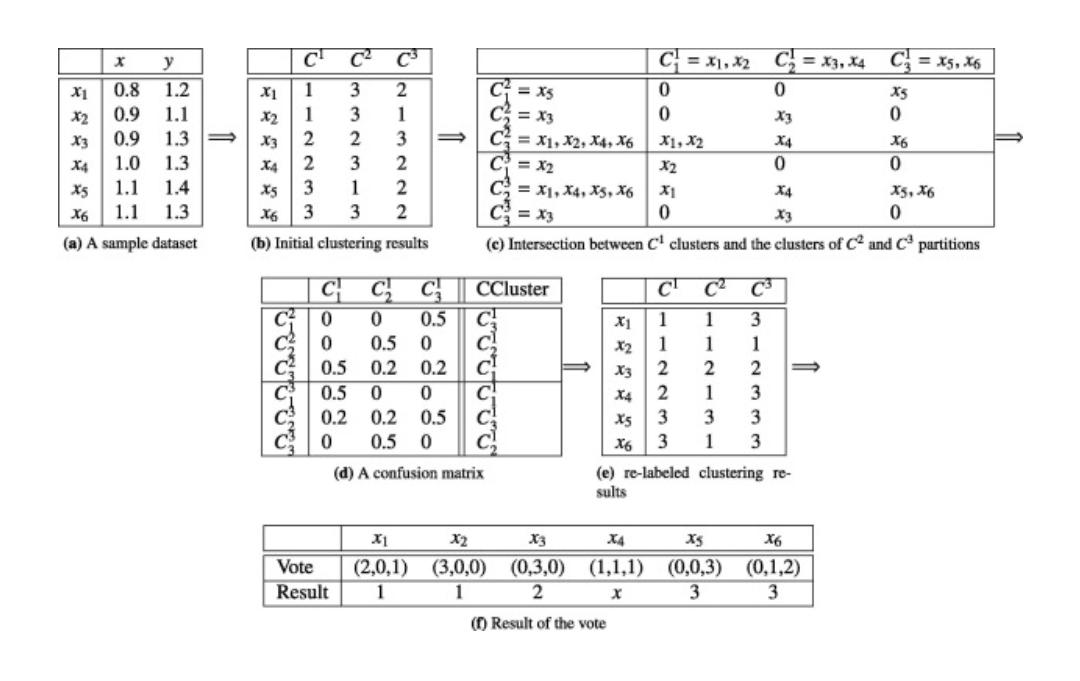

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_4184\2908327117.py:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(colon_df['Response'], sort = True)


Text(0, 0.5, 'Frequency')

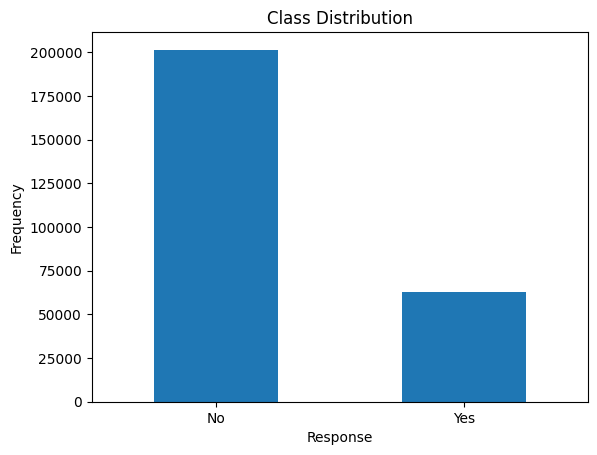

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns



count_classes = pd.value_counts(colon_df['Response'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("Class Distribution")
LABELS = ["No", "Yes"]
plt.xticks(range(2), LABELS)

plt.xlabel("Response")

plt.ylabel("Frequency")

In [13]:
print(colon_minority_df.shape,colon_majority_df.shape)

(62601, 11) (201377, 11)


In [14]:
majority=colon_majority_df['Response']
colon_majority_df=colon_majority_df.drop('Response',axis=1)
colon_majority_df.head()

Gender  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0       1                1          7.0                   1            1   
1       0                1         33.0                   0            1   
2       1                1         46.0                   1            1   
3       0                1         25.0                   1            1   
4       1                1          8.0                   0            0   

   Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  Age_Group  
0               0          2630.0                 152.0       16          1  
1               0         27645.0                 152.0       69          0  
2               0         29023.0                 152.0      211          1  
3               0         27954.0                 152.0       23          0  
4               1          2630.0                  26.0      209          1

# Different Clustering :

In [15]:
import pandas as pd
columns=['Kmeans','Kmeans++','Minibatch']
clustering_result=pd.DataFrame(columns=columns)

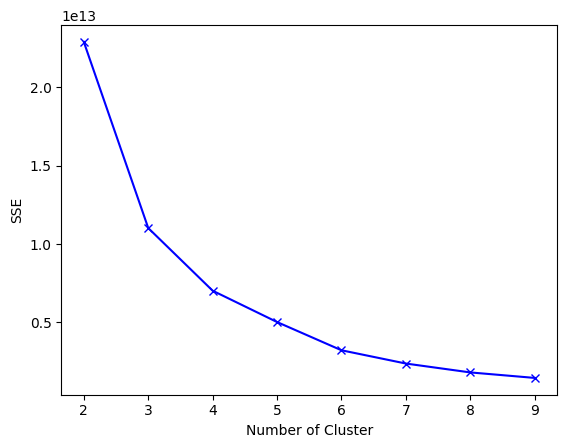

In [16]:
# Elbow method to find optimal K
from sklearn.cluster import KMeans

sse={}
for k in range(2,10):
  kmeans=KMeans(n_clusters=k,init='random',max_iter=500).fit(colon_majority_df)
  sse[k]=kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()),'bx-')
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.savefig("elbow_method.png")

In [17]:
num_of_clusters=5

##**KMEANS CLUSTERING**

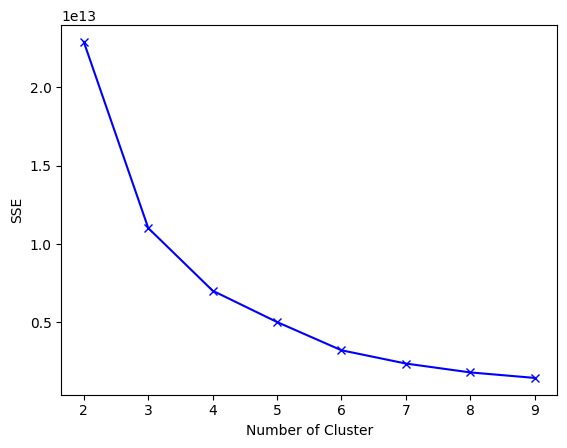

In [18]:
# Elbow method to find optimal K
from sklearn.cluster import KMeans

sse={}
for k in range(2,10):
  kmeans=KMeans(n_clusters=k,init='random',max_iter=500).fit(colon_majority_df)
  sse[k]=kmeans.inertia_
plt.plot(list(sse.keys()),list(sse.values()),'bx-')
plt.xlabel("Number of Cluster")
plt.ylabel("SSE")
plt.savefig("elbow_method.png")

In [19]:
#Kmeans:
kmeans=KMeans(n_clusters=num_of_clusters,init='random',max_iter=500).fit(colon_majority_df)
clustering_result['Kmeans']=kmeans.labels_

In [20]:
partition1 = colon_majority_df
partition1=partition1.reset_index(drop=True)
partition1['cluster_label'] = clustering_result['Kmeans']
partition1 #with cluster labels 

Gender  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0            1                1          7.0                   1            1   
1            0                1         33.0                   0            1   
2            1                1         46.0                   1            1   
3            0                1         25.0                   1            1   
4            1                1          8.0                   0            0   
...        ...              ...          ...                 ...          ...   
201372       1                1         49.0                   0            1   
201373       0                1          6.0                   1            1   
201374       1                1         15.0                   0            1   
201375       0                1         28.0                   1            1   
201376       0                1         18.0                   1            1   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0                    0          2630.0                 152.0       16   
1                    0         27645.0                 152.0       69   
2                    0         29023.0                 152.0      211   
3                    0         27954.0                 152.0       23   
4                    1          2630.0                  26.0      209   
...                ...             ...                   ...      ...   
201372               1          2630.0                 160.0      273   
201373               0         22911.0                 152.0      131   
201374               1         23938.0                 152.0      105   
201375               0         25380.0                 152.0      208   
201376               0         30396.0                 152.0      104   

        Age_Group  cluster_label  
0               1              3  
1               0              4  
2               1              4  
3               0              4  
4               1              3  
...           ...            ...  
201372          1              3  
201373          0              4  
201374          1              4  
201375          0              4  
201376          0              4  

[201377 rows x 11 columns]

# **CLUSTER VISUALIZATION USING PCA FOR REDUCING DIMENSIONS**

In [21]:
import plotly as py 
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

## **KMEANS++ CLUSTERING**

In [22]:
#Kmeans++:
kmeans=KMeans(n_clusters=num_of_clusters,init='k-means++',max_iter=500).fit(colon_majority_df)
clustering_result['Kmeans++']=kmeans.labels_

In [23]:
partition2 = colon_majority_df
partition2=partition2.reset_index(drop=True)
partition2['cluster_label'] = clustering_result['Kmeans++']
partition2 #with cluster labels 

Gender  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0            1                1          7.0                   1            1   
1            0                1         33.0                   0            1   
2            1                1         46.0                   1            1   
3            0                1         25.0                   1            1   
4            1                1          8.0                   0            0   
...        ...              ...          ...                 ...          ...   
201372       1                1         49.0                   0            1   
201373       0                1          6.0                   1            1   
201374       1                1         15.0                   0            1   
201375       0                1         28.0                   1            1   
201376       0                1         18.0                   1            1   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0                    0          2630.0                 152.0       16   
1                    0         27645.0                 152.0       69   
2                    0         29023.0                 152.0      211   
3                    0         27954.0                 152.0       23   
4                    1          2630.0                  26.0      209   
...                ...             ...                   ...      ...   
201372               1          2630.0                 160.0      273   
201373               0         22911.0                 152.0      131   
201374               1         23938.0                 152.0      105   
201375               0         25380.0                 152.0      208   
201376               0         30396.0                 152.0      104   

        Age_Group  cluster_label  
0               1              0  
1               0              2  
2               1              2  
3               0              2  
4               1              0  
...           ...            ...  
201372          1              0  
201373          0              2  
201374          1              2  
201375          0              2  
201376          0              2  

[201377 rows x 11 columns]

In [24]:
from kmodes.kmodes import KModes


km = KModes(n_clusters=num_of_clusters, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(colon_majority_df)

df_0_centroids=km.cluster_centroids_
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 25383, cost: 748669.0
Run 1, iteration: 2/100, moves: 76, cost: 748669.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 53364, cost: 711862.0
Run 2, iteration: 2/100, moves: 2393, cost: 711862.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 43091, cost: 703718.0
Run 3, iteration: 2/100, moves: 24793, cost: 703718.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 20936, cost: 713702.0
Run 4, iteration: 2/100, moves: 1611, cost: 713702.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 97617, cost: 693903.0
Run 5, iteration: 2/100, moves: 280, cost: 693897.0
Run 5, iteration: 3/100, moves: 0, cost: 693897.0
Best run was numb

array([0, 2, 0, ..., 0, 2, 2], dtype=uint16)

In [25]:
partition3 = colon_majority_df
partition3=partition3.reset_index(drop=True)
partition3['cluster_label'] = clusters
partition3 #with cluster labels 

Gender  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0            1                1          7.0                   1            1   
1            0                1         33.0                   0            1   
2            1                1         46.0                   1            1   
3            0                1         25.0                   1            1   
4            1                1          8.0                   0            0   
...        ...              ...          ...                 ...          ...   
201372       1                1         49.0                   0            1   
201373       0                1          6.0                   1            1   
201374       1                1         15.0                   0            1   
201375       0                1         28.0                   1            1   
201376       0                1         18.0                   1            1   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0                    0          2630.0                 152.0       16   
1                    0         27645.0                 152.0       69   
2                    0         29023.0                 152.0      211   
3                    0         27954.0                 152.0       23   
4                    1          2630.0                  26.0      209   
...                ...             ...                   ...      ...   
201372               1          2630.0                 160.0      273   
201373               0         22911.0                 152.0      131   
201374               1         23938.0                 152.0      105   
201375               0         25380.0                 152.0      208   
201376               0         30396.0                 152.0      104   

        Age_Group  cluster_label  
0               1              0  
1               0              2  
2               1              0  
3               0              2  
4               1              1  
...           ...            ...  
201372          1              1  
201373          0              2  
201374          1              0  
201375          0              2  
201376          0              2  

[201377 rows x 11 columns]

## **K-prototypes Clustering**

In [26]:
import pandas as pd 
import io 


colon_majority_df=colon_df[colon_df['Response']==0]

from sklearn.cluster import KMeans

# Assuming 'colon_majority' is your dataframe and 'num_of_clusters' is set
num_of_clusters = 5  # Example: set to 5 or any other appropriate number based on your data

# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=num_of_clusters, init='k-means++', verbose=2)

# Fit the model and predict clusters
clusters = kmeans.fit_predict(colon_majority_df)

# Print the resulting clusters
print(clusters)



Initialization complete
Iteration 0, inertia 6305317541159.0.
Iteration 1, inertia 5236403113492.188.
Iteration 2, inertia 5149046794534.139.
Iteration 3, inertia 5121392158519.799.
Iteration 4, inertia 5105493675647.403.
Iteration 5, inertia 5093983715623.65.
Iteration 6, inertia 5084535742037.338.
Iteration 7, inertia 5076655684584.262.
Iteration 8, inertia 5069777979958.591.
Iteration 9, inertia 5063567794784.278.
Iteration 10, inertia 5058458830901.676.
Iteration 11, inertia 5054544488499.206.
Iteration 12, inertia 5051323041940.564.
Iteration 13, inertia 5048147003916.377.
Iteration 14, inertia 5045747729084.582.
Iteration 15, inertia 5043455005244.738.
Iteration 16, inertia 5041205687211.9.
Iteration 17, inertia 5038601210429.992.
Iteration 18, inertia 5036719620257.182.
Iteration 19, inertia 5035549348972.377.
Iteration 20, inertia 5034554184431.318.
Iteration 21, inertia 5033607664281.952.
Iteration 22, inertia 5032390684685.436.
Iteration 23, inertia 5030632573746.508.
Iterati

In [27]:
partition4 = colon_majority_df
partition4=partition4.reset_index(drop=True)
partition4['cluster_label'] = clusters
partition4

Gender  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0            1                1          7.0                   1            1   
1            0                1         33.0                   0            1   
2            1                1         46.0                   1            1   
3            0                1         25.0                   1            1   
4            1                1          8.0                   0            0   
...        ...              ...          ...                 ...          ...   
201372       1                1         49.0                   0            1   
201373       0                1          6.0                   1            1   
201374       1                1         15.0                   0            1   
201375       0                1         28.0                   1            1   
201376       0                1         18.0                   1            1   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0                    0          2630.0                 152.0       16   
1                    0         27645.0                 152.0       69   
2                    0         29023.0                 152.0      211   
3                    0         27954.0                 152.0       23   
4                    1          2630.0                  26.0      209   
...                ...             ...                   ...      ...   
201372               1          2630.0                 160.0      273   
201373               0         22911.0                 152.0      131   
201374               1         23938.0                 152.0      105   
201375               0         25380.0                 152.0      208   
201376               0         30396.0                 152.0      104   

        Age_Group  Response  cluster_label  
0               1         0              0  
1               0         0              3  
2               1         0              3  
3               0         0              3  
4               1         0              0  
...           ...       ...            ...  
201372          1         0              0  
201373          0         0              3  
201374          1         0              3  
201375          0         0              3  
201376          0         0              3  

[201377 rows x 12 columns]

## **MINIBATCH KMEANS CLUSTERING**

In [28]:
from sklearn.cluster import MiniBatchKMeans
mbk = MiniBatchKMeans(init='k-means++', n_clusters=num_of_clusters, batch_size=40, n_init=10, max_no_improvement=10, verbose=0)
mbk.fit(colon_majority_df)
clustering_result['Minibatch']=mbk.labels_

In [29]:
clustering_result['Minibatch'].values

array([1, 0, 0, ..., 0, 0, 4])

In [30]:
partition5 = colon_majority_df
partition5=partition5.reset_index(drop=True)
partition5['cluster_label'] = clustering_result['Minibatch']
partition5

Gender  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0            1                1          7.0                   1            1   
1            0                1         33.0                   0            1   
2            1                1         46.0                   1            1   
3            0                1         25.0                   1            1   
4            1                1          8.0                   0            0   
...        ...              ...          ...                 ...          ...   
201372       1                1         49.0                   0            1   
201373       0                1          6.0                   1            1   
201374       1                1         15.0                   0            1   
201375       0                1         28.0                   1            1   
201376       0                1         18.0                   1            1   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0                    0          2630.0                 152.0       16   
1                    0         27645.0                 152.0       69   
2                    0         29023.0                 152.0      211   
3                    0         27954.0                 152.0       23   
4                    1          2630.0                  26.0      209   
...                ...             ...                   ...      ...   
201372               1          2630.0                 160.0      273   
201373               0         22911.0                 152.0      131   
201374               1         23938.0                 152.0      105   
201375               0         25380.0                 152.0      208   
201376               0         30396.0                 152.0      104   

        Age_Group  Response  cluster_label  
0               1         0              1  
1               0         0              0  
2               1         0              0  
3               0         0              0  
4               1         0              1  
...           ...       ...            ...  
201372          1         0              1  
201373          0         0              0  
201374          1         0              0  
201375          0         0              0  
201376          0         0              4  

[201377 rows x 12 columns]

## **Fuzzy K-Means Clustering**

In [31]:
import numpy as np
from fcmeans import FCM


In [32]:
fcm = FCM(n_clusters=num_of_clusters)
fcm.fit(colon_majority_df.values)
# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(colon_majority_df.values)
fcm_labels

array([0, 4, 4, ..., 4, 4, 1], dtype=int64)

In [33]:
partition6 = colon_majority_df
partition6=partition6.reset_index(drop=True)
partition6['cluster_label'] = fcm_labels
partition6

Gender  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0            1                1          7.0                   1            1   
1            0                1         33.0                   0            1   
2            1                1         46.0                   1            1   
3            0                1         25.0                   1            1   
4            1                1          8.0                   0            0   
...        ...              ...          ...                 ...          ...   
201372       1                1         49.0                   0            1   
201373       0                1          6.0                   1            1   
201374       1                1         15.0                   0            1   
201375       0                1         28.0                   1            1   
201376       0                1         18.0                   1            1   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0                    0          2630.0                 152.0       16   
1                    0         27645.0                 152.0       69   
2                    0         29023.0                 152.0      211   
3                    0         27954.0                 152.0       23   
4                    1          2630.0                  26.0      209   
...                ...             ...                   ...      ...   
201372               1          2630.0                 160.0      273   
201373               0         22911.0                 152.0      131   
201374               1         23938.0                 152.0      105   
201375               0         25380.0                 152.0      208   
201376               0         30396.0                 152.0      104   

        Age_Group  Response  cluster_label  
0               1         0              0  
1               0         0              4  
2               1         0              4  
3               0         0              4  
4               1         0              0  
...           ...       ...            ...  
201372          1         0              0  
201373          0         0              4  
201374          1         0              4  
201375          0         0              4  
201376          0         0              1  

[201377 rows x 12 columns]

In [34]:
partition1, partition2, partition3, partition4,partition5,partition6

(        Gender  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
 0            1                1          7.0                   1            1   
 1            0                1         33.0                   0            1   
 2            1                1         46.0                   1            1   
 3            0                1         25.0                   1            1   
 4            1                1          8.0                   0            0   
 ...        ...              ...          ...                 ...          ...   
 201372       1                1         49.0                   0            1   
 201373       0                1          6.0                   1            1   
 201374       1                1         15.0                   0            1   
 201375       0                1         28.0                   1            1   
 201376       0                1         18.0                   1            1   
 
         Vehic

In [35]:
c = 0
for i in range(len(partition1.cluster_label)):
  print(partition1.cluster_label[i], partition2.cluster_label[i], partition3.cluster_label[i],partition4.cluster_label[i],partition5.cluster_label[i],partition6.cluster_label[i])
  #if partition1.cluster_label[i]==partition2.cluster_label[i]:
    #c+=1

3 0 0 0 1 0
4 2 2 3 0 4
4 2 0 3 0 4
4 2 2 3 0 4
3 0 1 0 1 0
3 0 0 0 1 0
2 3 0 4 2 2
2 1 2 4 3 3
1 1 0 1 3 1
3 0 2 0 1 0
4 2 0 3 4 1
4 2 0 3 0 4
4 2 2 3 0 4
4 2 0 3 0 4
3 0 2 0 1 0
3 0 1 0 1 0
4 2 0 3 0 4
1 1 2 1 3 3
4 2 3 3 0 4
4 2 2 3 0 4
2 1 3 4 3 3
2 3 3 4 2 2
4 2 1 3 0 4
2 3 0 4 2 2
0 3 3 2 2 2
1 1 2 1 4 1
2 3 2 4 2 3
4 2 2 3 0 4
1 1 1 1 3 3
4 2 2 3 0 4
4 2 3 3 4 4
4 2 0 3 4 1
4 2 0 3 0 4
4 2 2 3 0 4
4 2 1 3 0 4
4 2 2 3 0 4
4 2 2 3 0 4
4 2 1 3 0 4
4 2 2 3 0 4
4 2 2 3 0 4
4 2 0 3 4 1
1 1 0 1 4 1
4 2 0 3 0 4
1 1 2 1 3 3
1 1 2 1 3 3
3 0 0 0 1 0
4 2 3 3 0 4
2 3 0 4 2 3
4 2 2 3 0 4
4 2 2 3 4 1
1 1 2 1 4 1
4 2 3 3 0 4
3 0 2 0 1 0
1 1 2 1 4 1
4 2 0 3 0 4
3 0 2 0 1 0
2 3 2 4 2 2
3 0 0 0 1 0
4 2 0 3 0 4
1 2 2 1 4 1
4 2 2 3 0 4
0 3 3 2 2 2
1 1 2 1 3 3
1 1 2 1 3 3
1 1 3 1 4 1
0 3 2 2 2 2
4 2 0 3 0 4
1 1 2 1 4 1
3 0 0 0 1 0
2 3 0 4 2 2
4 2 3 3 0 4
1 1 2 1 4 1
4 2 2 3 0 4
3 0 0 0 1 0
4 2 2 3 0 4
1 1 0 1 3 3
1 1 1 1 3 3
2 3 2 4 2 2
4 2 2 3 0 4
4 2 2 3 0 4
1 1 0 1 3 3
4 2 2 3 0 4
4 2 1 3 0 4
4 2 

## **Finding the 3 Best algorithms for our model:**

In [36]:
from sklearn.metrics import davies_bouldin_score
print("Kmeans (partition 1): ",davies_bouldin_score(colon_majority_df, partition1.cluster_label))
print("Kmeans++ (partition 2): ",davies_bouldin_score(colon_majority_df, partition2.cluster_label))
print("KModes (partition 3): ",davies_bouldin_score(colon_majority_df, partition3.cluster_label))
print("K-prototypes(partition 4): ",davies_bouldin_score(colon_majority_df, partition4.cluster_label))
print("Minibatch Kmeans (partition 5): ",davies_bouldin_score(colon_majority_df, partition5.cluster_label))
print("Fuzzy K-means(partition 6): ",davies_bouldin_score(colon_majority_df, partition6.cluster_label))

Kmeans (partition 1):  0.5126953254514446
Kmeans++ (partition 2):  0.47224753810199066
KModes (partition 3):  531.2273760224662
K-prototypes(partition 4):  0.5126856432222543
Minibatch Kmeans (partition 5):  0.5182734329923353
Fuzzy K-means(partition 6):  0.5106155292883892


In [37]:
partitionA, partitionB, partitionC = partition1, partition5, partition6

In [38]:

colon_majority = colon_majority_df
colon_majority['C1'] = partitionA.cluster_label.values
colon_majority['C2'] = partitionB.cluster_label.values
colon_majority['C3'] = partitionC.cluster_label.values
colon_majority

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_4184\2733184496.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_4184\2733184496.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\USER-PC\AppData\Local\Temp\ipykernel_4184\2733184496.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

Gender  Driving_License  Region_Code  Previously_Insured  Vehicle_Age  \
0            1                1          7.0                   1            1   
1            0                1         33.0                   0            1   
2            1                1         46.0                   1            1   
3            0                1         25.0                   1            1   
4            1                1          8.0                   0            0   
...        ...              ...          ...                 ...          ...   
201372       1                1         49.0                   0            1   
201373       0                1          6.0                   1            1   
201374       1                1         15.0                   0            1   
201375       0                1         28.0                   1            1   
201376       0                1         18.0                   1            1   

        Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0                    0          2630.0                 152.0       16   
1                    0         27645.0                 152.0       69   
2                    0         29023.0                 152.0      211   
3                    0         27954.0                 152.0       23   
4                    1          2630.0                  26.0      209   
...                ...             ...                   ...      ...   
201372               1          2630.0                 160.0      273   
201373               0         22911.0                 152.0      131   
201374               1         23938.0                 152.0      105   
201375               0         25380.0                 152.0      208   
201376               0         30396.0                 152.0      104   

        Age_Group  Response  C1  C2  C3  
0               1         0   3   1   0  
1               0         0   4   0   4  
2               1         0   4   0   4  
3               0         0   4   0   4  
4               1         0   3   1   0  
...           ...       ...  ..  ..  ..  
201372          1         0   3   1   0  
201373          0         0   4   0   4  
201374          1         0   4   0   4  
201375          0         0   4   0   4  
201376          0         0   4   4   1  

[201377 rows x 14 columns]

In [40]:
colon_majority.to_csv('C:\\Users\\USER-PC\\Desktop\\ThesisCode\\Data\\Preprocessed\\colon_majority_1.csv', index = False)